## <font color = "lightseagreen">0. Importing Libraries<font>

In [1]:
# basic libraries
import pandas as pd
import numpy as np
import sys

###import datetime

# path and data management
import os
import shutil

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

from random import sample
import time
import re
import warnings

# image manipulation/processing
import rioxarray
from PIL import Image
from IPython.display import Image as ipimage
import odc

# FROM ISI'S REPO
import shutil # High-level file operations
import random # to generate random samples

# Computer Vision
import tensorflow as tf # machine learning and neural networks
from tensorflow import keras # deep learning and neural networks
from tensorflow.keras import layers # layers for neural networks
from tensorflow.keras.preprocessing.image import ImageDataGenerator # real-time data augmentation
# NOT FROM ISI'S REPO

# classification
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
# setting session parameters
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

## <font color = "lightseagreen">1. Importing Datasets<font>

<h3 style = "color:dimgray">Data description:</h3>
<font color = = "dimgray">The full dataset, consisting of 4 folders representing the 4 categories "cloudy", "desert", "green area" and "water", with 1500, 1131, 1500 and 1500 images respectively was retrieved from <a href="https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification">Satellite Image Classification</a>.<font>

<h3 style = "color:dimgray">Goal:</h3>
<font color = = "dimgray">The use of maching learning algorithm(s) for the classification of the images in the abovementioned categories.<font>

In [3]:
# Defining data paths. Note that all the files were initially in the same folders per category and since most of them will 
# be used for training the model, they were saved the "train" folder. Later on they will be sampled to create the test sets
data_path = os.path.join(os.getcwd(), "data")

cloudy_train = os.path.join(data_path, "train/cloudy")
desert_train = os.path.join(data_path, "train/desert")
greenery_train = os.path.join(data_path, "train/green_area")
water_train = os.path.join(data_path, "train/water")

# defining directories to be created
cloudy_test = os.path.join(data_path, "test/cloudy")
desert_test = os.path.join(data_path, "test/desert")
greenery_test = os.path.join(data_path, "test/green_area")
water_test = os.path.join(data_path, "test/water")

# listing image names
cloudy_img_lst = os.listdir("data/train/cloudy")
desert_img_lst = os.listdir("data/train/desert")
greenery_img_lst = os.listdir("data/train/green_area")
water_img_lst = os.listdir("data/train/water")

In [4]:
# COPIED FROM ISI - creating new directories and ### Making sure new directories do not overwrite previous ones ~ Sabina awesomeness
def still_test_dir():
    os.makedirs(cloudy_test, exist_ok=True)
    os.makedirs(desert_test, exist_ok=True)
    os.makedirs(greenery_test, exist_ok=True)
    os.makedirs(water_test, exist_ok=True)

still_test_dir()

## <font color = "lightseagreen">2. Data Cleaning<font>

In [5]:
# On examination of the folders' contents, it was made clear that the cloudy images all have the prefix "train" since the
# models will be trained and validated using samples of all images and for the avoidance of confusion, renaming them seems only right
print("Cloudy image title check:", sample(cloudy_img_lst, 5), "\n")
print("Desert image title check:", sample(desert_img_lst, 5), "\n")
print("Green area title prefix check:", sample(greenery_img_lst, 5), "\n")
print("Water image title check:", sample(water_img_lst, 5))

Cloudy image title check: ['train_35499.jpg', 'train_30389.jpg', 'train_18768.jpg', 'train_29201.jpg', 'train_6829.jpg'] 

Desert image title check: ['desert(563).jpg', 'desert(494).jpg', 'desert(229).jpg', 'desert(219).jpg', 'desert(827).jpg'] 

Green area title prefix check: ['Forest_466.jpg', 'Forest_1456.jpg', 'Forest_551.jpg', 'Forest_2986.jpg', 'Forest_496.jpg'] 

Water image title check: ['SeaLake_708.jpg', 'SeaLake_1993.jpg', 'SeaLake_392.jpg', 'SeaLake_2528.jpg', 'SeaLake_1699.jpg']


In [6]:
# double-checking
pattern1 = r"train_(\d+)"  # pattern provided by ChatGPT
pattern2 = r"cloudy_(\d+)"
num_match1 = 0
num_match2 = 0

# iterating
for filename in cloudy_img_lst:
    match1 = re.match(pattern1, random.choice(cloudy_img_lst))
    match2 = re.match(pattern2, random.choice(cloudy_img_lst))
    if match1:
        num_match1 += 1
    elif match2:
        num_match2 += 1
    else:
        print("no match", filename)

print("num train", num_match1)
print("num cloudy", num_match2)

num train 1500
num cloudy 0


In [7]:
# finally changing names of files in direcrory
for filename in cloudy_img_lst:
    match = re.match(pattern1, filename)
    if match:
        num = match.group(1)  # keeping number part intact
        new_filename = f"cloudy_{num}.jpg"  # defining new filename
        os.rename(os.path.join(cloudy_train + "/" + filename), (cloudy_train + "/" + new_filename))
    else:
        continue

# redefining cloudy image list with new file names
cloudy_img_lst = os.listdir("data/train/cloudy")

# double-checking
print("Cloudy image title check:", sample(cloudy_img_lst, 5), "\n")

Cloudy image title check: ['cloudy_25747.jpg', 'cloudy_15278.jpg', 'cloudy_33758.jpg', 'cloudy_18444.jpg', 'cloudy_20554.jpg'] 



In [6]:
# also changing the name of "SeaLake" images to "water" to avoid confusion
pattern1 = r"SeaLake_(\d+)"  # pattern provided by ChatGPT

for filename in water_img_lst:
    match = re.match(pattern1, filename)
    if match:
        num = match.group(1)  # keeping number part intact
        new_filename = f"water_{num}.jpg"  # defining new filename
        os.rename(os.path.join(water_train + "/" + filename), (water_train + "/" + new_filename))
    else:
        continue

# redefining cloudy image list with new file names
water_img_lst = os.listdir("data/train/water")

# double-checking
print("Water image title check:", sample(water_img_lst, 5), "\n")

Water image title check: ['water_1366.jpg', 'water_1961.jpg', 'water_1379.jpg', 'water_828.jpg', 'water_1939.jpg'] 



In [8]:
print("count_cloudy:", len(cloudy_img_lst))
print("count_desert:", len(desert_img_lst))
print("count_greenery:", len(greenery_img_lst))
print("count_cloudy:", len(water_img_lst), "\n")
print("count_all:", len(cloudy_img_lst + desert_img_lst + greenery_img_lst + water_img_lst))

count_cloudy: 1500
count_desert: 1131
count_greenery: 1500
count_cloudy: 1500 

count_all: 5631


In [7]:
# creating dataframe with image names and categories
image_df = pd.DataFrame(columns = ["img_name", "img_class"])

# list with all image names
img_list = cloudy_img_lst + desert_img_lst + greenery_img_lst + water_img_lst

# filling out image name column
image_df["img_name"] = img_list

In [11]:
# regex patterns to fill "class" column
pattern_cl = r"^cloudy"
pattern_des = r"^desert"
pattern_gr = r"^Forest"
pattern_wa = r"^water"

# filling out class column
for file_name in image_df.img_name:
    # match objects or None
    match1 = re.search(pattern_cl, str(file_name))
    match2 = re.search(pattern_des, str(file_name))
    match3 = re.search(pattern_gr, str(file_name))
    match4 = re.search(pattern_wa, str(file_name))
    if match1:
        image_df["img_class"].loc[image_df["img_name"]==file_name] = str(match1.group(0))
    elif match2:
        image_df["img_class"].loc[image_df["img_name"]==file_name] = str(match2.group(0))
    elif match3:
        image_df["img_class"].loc[image_df["img_name"]==file_name] = str(match3.group(0))
    elif match4:
        image_df["img_class"].loc[image_df["img_name"]==file_name] = str(match4.group(0))
    else:
        continue

image_df

,img_name,class
0,cloudy_10021.jpg,cloudy
1,cloudy_10043.jpg,cloudy
2,cloudy_10070.jpg,cloudy
3,cloudy_10081.jpg,cloudy
4,cloudy_10096.jpg,cloudy
...,...,...
5587,water_995.jpg,water
5588,water_996.jpg,water
5589,water_997.jpg,water
5590,water_998.jpg,water


In [12]:
# checking to see if all rows were filled
image_df.isna().sum()

img_name    0
class       0
dtype: int64

In [13]:
# # taking a closer look into the filenames
# for name in image_df.img_name:
#     sys.stdout.write(name + "\n")

<font color = "dimgray">Some of the images in the desert folder seem to be duplicated as pairs like "desert(1007).jpg" and "desert(1007) (1).jpg" exist. What is more, the filenames of only this folder are written in a different folder<font>

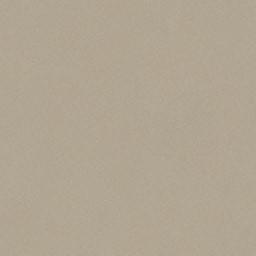

In [17]:
# checking visually
ipimage(desert_train + "/" + "desert(1007).jpg", width=200)

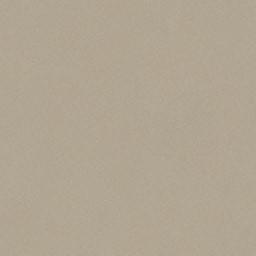

In [18]:
ipimage(desert_train + "/" + "desert(1007) (1).jpg", width=200)

In [19]:
# double-checking with code
try:
    ipimage(desert_train + "/" + "desert(1007).jpg", width=200) == ipimage(desert_train + "/" + "desert(1007) (1).jpg", width=200)
except:
    print("Not the same")
else:
    print("The same")

The same


In [20]:
# Disposing of spaces in names and standardizing name format
pattern_s = r"\s\(\d+\)" # regex writtern with the help of ChatGPT

# Dirs to iterate upon
list_paths_train = [cloudy_train, desert_train, greenery_train, water_train]

# Iterating on each path
for the_dir in list_paths_train:
    # Iterating for each filename in the dataframe 
    for filename in image_df.img_name:
        # File directory
        the_file = the_dir + "/" + filename
        # Checking first if file directory exists
        if os.path.exists(the_file):
            # If exists check if pattern matches
            match = re.search(pattern_s, filename)
            if match:
                # Removing image from dir
                os.remove(the_file)
                # Removing its record from image_df
                image_df = image_df.drop(image_df.loc[image_df["img_name"] == filename].index)
            elif not match:
                # If image is no duplicate, just standardize its name
                new_filename = filename.replace("(", "_", 1).replace("(", "").replace(")", "").lower()
                os.rename(os.path.join(the_dir + "/" + filename), (the_dir + "/" + new_filename))
        # If path doesn't exist, i.e. file is in different path
        else:
            continue

In [13]:
# applying name standardization to the df
for column in image_df.columns:
    image_df[column] = image_df[column].apply(lambda x : str(x).replace("(", "_", 1).replace("(", "").replace(")", "").lower())

image_df = image_df.reset_index(drop = True)
image_df

,img_name,class
0,cloudy_10021.jpg,cloudy
1,cloudy_10043.jpg,cloudy
2,cloudy_10070.jpg,cloudy
3,cloudy_10081.jpg,cloudy
4,cloudy_10096.jpg,cloudy
...,...,...
5587,water_995.jpg,water
5588,water_996.jpg,water
5589,water_997.jpg,water
5590,water_998.jpg,water


In [5]:
# to avoid repeating all the file operations and directory management for each new session
#image_df.to_csv("data/image_df.csv", index=0)
image_df = pd.read_csv("data/image_df.csv")

## <font color = "lightseagreen">3. Addressing Data Imbalance<font>

In [15]:
# let's take a look at the value counts
image_df["img_class"].value_counts()

cloudy    1500
forest    1500
water     1500
desert    1092
Name: class, dtype: int64

<font color = "dimgray">The desert class was already under-represented, but after the removal of duplicate images, it  became even more so.<font>

<font color = "dimgray">2 folders will be used. One for the baseline models using the unbalanced data and one for the models using the balanced data.<font>

In [9]:
# Creating path
data_balance = os.path.join(os.getcwd(), "data_balance")

# Copying data
dest = shutil.copytree(data_path, data_balance)

# Checking that tree has been copied
print(os.listdir(data_balance))

['balanced_df.csv', 'test', 'train']


In [20]:
# defining new paths for the image folders
cloudy_btrain = os.path.join(data_balance, "train/cloudy")
desert_btrain = os.path.join(data_balance, "train/desert")
greenery_btrain = os.path.join(data_balance, "train/green_area")
water_btrain = os.path.join(data_balance, "train/water")

# defining directories to be created
cloudy_bvalid = os.path.join(data_balance, "valid/cloudy")
desert_bvalid = os.path.join(data_balance, "valid/desert")
greenery_bvalid = os.path.join(data_balance, "valid/green_area")
water_bvalid = os.path.join(data_balance, "valid/water")

still_test_dir()

In [24]:
# Balancing the data in this case can easily be done by limiting the number of files to process
#  for the over-represented classes to that of the under-represented one
# A simple way to do that is to sample the data using the index at our disposal (image_df)
sample_cloudy = image_df[image_df["img_class"]=="cloudy"].sample(1092)
sample_forest = image_df[image_df["img_class"]=="forest"].sample(1092)
sample_water = image_df[image_df["img_class"]=="water"].sample(1092)

In [ ]:
# putting the collection together
balanced_df = pd.concat([sample_cloudy, sample_forest, sample_water, image_df[image_df["img_class"]=="desert"]], axis = 0).sample(frac = 1).reset_index(drop = True)
balanced_df

In [38]:
balanced_df["img_class"].value_counts()

desert    1092
water     1092
forest    1092
cloudy    1092
Name: class, dtype: int64

In [11]:
#balanced_df.to_csv("data_balance/balanced_df.csv", index = 0)
balanced_df = pd.read_csv("data_balance/balanced_df.csv")

In [12]:
# first let's tidy up the folders by deleting images not existing in the dataframe
dir_bcloudy = os.listdir(cloudy_btrain)
dir_bdesert = os.listdir(desert_btrain)
dir_bgreen = os.listdir(greenery_btrain)
dir_bwater = os.listdir(water_btrain)

In [ ]:
# Dirs to iterate upon
paths_list = [cloudy_btrain, desert_btrain, greenery_btrain, water_btrain]
folders = [dir_bcloudy, dir_bdesert, dir_bgreen, dir_bwater]

# Iterating on each folder dir
for i in range(0,len(folders)):
    folder = folders[i]
    path = paths_list[i]
    # Iterating on file in the folder
    for folder_filename in folder:
        # File directory
        the_file = path + "/" + folder_filename
        # Checking first if file directory exists
        if os.path.exists(the_file):
            # If exists in list
            if folder_filename in balanced_df.img_name.unique().tolist():
                # Keep image
                continue
            else:
                os.remove(the_file)
        # If path doesn't exist, i.e. file is in different path
        else:
            continue

## <font color = "lightseagreen">4. Train-test split<font>

In [13]:
# Function for moving images
def move_img(img_list, source, destination):
    for name in img_list:
        #if name != '.ipynb_checkpoints':
        shutil.move(source + "/" + name, destination +  "/" + name)
        #else:
            #continue

def copy_img(img_list, source, destination)

In [37]:
# Function to train-test split
#### CAN USE IMPROVEMENTS --> ITERATE ON CLASS_LISTS AND SAMPLES, APPEND THEM TO LIST, SAME FOR TUPLES, ADD PART AND ARGUMENTS THAT CREATE TUPLES IN FUNCTION ####
############ EVEN MORE IMPROVEMENTS? --> WRITE FUNCTION THAT PICKS SAMPLE FROM IMAGE FOLDERS, BUT DOESN'T NED TO CREATE NEW DIRECTORIES TO WORK, BUT INSTEAD USES NAMES OF FILES TO ACCESS THEM FOR THE MODEL EACH TIME ###############
def homemade_split(df, class_column, name_column, source_dest_tuple_list):
    
    # list of classes sorted
    class_list = df[class_column].unique()
    class_list.sort()
    
    # listing images of the 4 classes
    list_class_1 = list(df[df[class_column]==class_list[0]][name_column])
    list_class_2 = list(df[df[class_column]==class_list[1]][name_column])
    list_class_3 = list(df[df[class_column]==class_list[2]][name_column])
    list_class_4 = list(df[df[class_column]==class_list[3]][name_column])
    
    # Storing random sample of 25% of names of items to be moved in new lists
    list_class_1_test_sample = sample(list_class_1, int((len(list_class_1) * .25)))
    list_class_2_test_sample = sample(list_class_2, int((len(list_class_2) * .25)))
    list_class_3_test_sample = sample(list_class_3, int((len(list_class_3) * .25)))
    list_class_4_test_sample = sample(list_class_4, int((len(list_class_4) * .25)))
    
    # Moving images corresponding to test samples
    samples = [list_class_1_test_sample, list_class_2_test_sample, list_class_3_test_sample, list_class_4_test_sample]
    
    # creating tuples with (sample, source, destination)
    tuple_1 = list_class_1_test_sample, source_dest_tuple_list[0][0], source_dest_tuple_list[0][1]
    tuple_2 = list_class_2_test_sample, source_dest_tuple_list[1][0], source_dest_tuple_list[1][1]
    tuple_3 = list_class_3_test_sample, source_dest_tuple_list[2][0], source_dest_tuple_list[2][1]
    tuple_4 = list_class_4_test_sample, source_dest_tuple_list[3][0], source_dest_tuple_list[3][1]
    
    tuples = [tuple_1, tuple_2, tuple_3, tuple_4]
    
    for tuple_trio in tuples:
        move_img(tuple_trio[0], tuple_trio[1], tuple_trio[2])
        

    # Merging sample lists
    test_list = [*list_class_1_test_sample, *list_class_2_test_sample, *list_class_3_test_sample, *list_class_4_test_sample]

    # Creating test_df
    test_df = df[df[name_column].isin(test_list)].reset_index(drop=True)

    # Creating train_df
    train_df = df[~df["img_name"].isin(test_list)].reset_index(drop=True)
    
    return train_df, test_df

In [32]:
# Since the function above is dependent on a sorted list of class names to function correctly, let's see how the sorted list looks like and write our tuples list accordingly
class_list = image_df["img_class"].unique()
class_list.sort()
class_list

array(['cloudy', 'desert', 'forest', 'water'], dtype=object)

In [35]:
# (source, destination) tuples for imbalanced data
imb_cl_tuple = cloudy_train, cloudy_valid
imb_des_tuple = desert_train, desert_valid
imb_gr_tuple = greenery_train, greenery_valid
imb_wat_tuple = water_train, water_valid

# Tuple list for imbalanced data
imbalanced_tuple_list = [imb_cl_tuple, imb_des_tuple, imb_gr_tuple, imb_wat_tuple]

# Splitting imbalanced data
imbalanced_train, imbalanced_valid = homemade_split(image_df, "img_class", "img_name", imbalanced_tuple_list)

In [45]:
# indentation trick found at https://stackoverflow.com/questions/18756510/printing-with-indentation-in-python
print("Length of test set:", len(imbalanced_test["img_class"]), "of which", "\n",
      f"{'':<20}{len(imbalanced_test[imbalanced_test['img_class']=='cloudy'])}", "cloudy", "\n",
         f"{'':<20}{len(imbalanced_test[imbalanced_test['img_class']=='desert'])}", "desert", "\n", 
         f"{'':<20}{len(imbalanced_test[imbalanced_test['img_class']=='forest'])}", "forest", "\n",
         f"{'':<20}{len(imbalanced_test[imbalanced_test['img_class']=='water'])}", "water", "\n")
print("Length of train set:", len(imbalanced_train), "of which", "\n",
      f"{'':<20}{len(imbalanced_train[imbalanced_train['img_class']=='cloudy'])}", "cloudy", "\n",
         f"{'':<21}{len(imbalanced_train[imbalanced_train['img_class']=='desert'])}", "desert", "\n", 
         f"{'':<20}{len(imbalanced_train[imbalanced_train['img_class']=='forest'])}", "forest", "\n",
         f"{'':<20}{len(imbalanced_train[imbalanced_train['img_class']=='water'])}", "water")

Length of test set: 1398 of which 
                     375 cloudy 
                     273 desert 
                     375 forest 
                     375 water 

Length of train set: 4194 of which 
                     1125 cloudy 
                      819 desert 
                     1125 forest 
                     1125 water


In [47]:
# file operations are costly timewise and must be precise. saving dfs to csv to avoid having to use listdir with each new session
#imbalanced_train.to_csv("data/imbalanced_train.csv", index = 0)
#imbalanced_test.to_csv("data/imbalanced_test.csv", index = 0)

In [ ]:
imbalanced_train = pd.read_csv("data/imbalanced_train.csv")
imbalanced_test = pd.read_csv("data/imbalanced_test.csv")

In [46]:
# better safe than sorry
class_list = balanced_df["img_class"].unique()
class_list.sort()
class_list

array(['cloudy', 'desert', 'forest', 'water'], dtype=object)

In [ ]:
# (source, destination) tuples for balanced data
bal_cl_tuple = cloudy_btrain, cloudy_btest
bal_des_tuple = desert_btrain, desert_btest
bal_gr_tuple = greenery_btrain, greenery_btest
bal_wat_tuple = water_btrain, water_btest

# Tuple list for balanced data
balanced_tuple_list = [bal_cl_tuple, bal_des_tuple, bal_gr_tuple, bal_wat_tuple]

# Splitting balanced data
balanced_train, balanced_test = homemade_split(balanced_df, "img_class", "img_name", balanced_tuple_list)

In [41]:
# # listing images of the 4 classes
# cloudy_blist = list(balanced_df[balanced_df["img_class"]=="cloudy"]["img_name"])
# desert_blist = list(balanced_df[balanced_df["img_class"]=="desert"]["img_name"])
# greenery_blist = list(balanced_df[balanced_df["img_class"]=="forest"]["img_name"])
# water_blist = list(balanced_df[balanced_df["img_class"]=="water"]["img_name"])

# # Storing random sample of 25% of names of items to be moved in new lists
# cloudy_btest_sample = sample(cloudy_blist, int((len(cloudy_blist) * .25)))
# desert_btest_tsample = sample(desert_blist, int((len(desert_blist) * .25)))
# greenery_btest_tsample = sample(greenery_blist, int((len(greenery_blist) * .25)))
# water_btest_tsample = sample(water_blist, int((len(water_blist) * .25)))

# # Moving the images
# samples = [cloudy_btest_sample, desert_btest_tsample, greenery_btest_tsample, water_btest_tsample]

# move_img(cloudy_btest_sample, cloudy_btrain, cloudy_btest)
# move_img(desert_btest_tsample, desert_btrain, desert_btest)
# move_img(greenery_btest_tsample, greenery_btrain, greenery_btest)
# move_img(water_btest_tsample, water_btrain, water_btest)

# # Separating train-test dataframes
# test_list = [*cloudy_btest_sample, *desert_btest_tsample, *greenery_btest_tsample, *water_btest_tsample]

# # Creating test_df
# test_df = balanced_df[balanced_df["img_name"].isin(test_list)].reset_index(drop=True)

# # Creating train_df
# train_df = balanced_df[~balanced_df["img_name"].isin(test_list)].reset_index(drop=True)

In [50]:
# # to access already processed directories of balanced
# dir_bcloudy_train = os.listdir(cloudy_btrain)
# dir_bdesert_train = os.listdir(desert_btrain)
# dir_bgreen_train = os.listdir(greenery_btrain)
# dir_bwater_train = os.listdir(water_btrain)

# balanced_train_list = [*dir_bcloudy_train, *dir_bdesert_train, *dir_bgreen_train, *dir_bwater_train]

# dir_bcloudy_test = os.listdir(cloudy_btest)
# dir_bdesert_test = os.listdir(desert_btest)
# dir_bgreen_test = os.listdir(greenery_btest)
# dir_bwater_test = os.listdir(water_btest)

# balanced_test_list = [*dir_bcloudy_test, *dir_bdesert_test, *dir_bgreen_test, *dir_bwater_test]

# # # Creating train_df
# balanced_train = balanced_df[~balanced_df["img_name"].isin(balanced_train_list)].reset_index(drop=True)

# # # Creating test_df
# balanced_test = balanced_df[balanced_df["img_name"].isin(balanced_test_list)].reset_index(drop=True)

# file operations are costly timewise and must be precise. saving dfs to csv to avoid having to use listdir with each new session
# balanced_train.to_csv("data_balance/balanced_train.csv", index = 0)
# balanced_test.to_csv("data_balance/balanced_test.csv", index = 0)

In [49]:
# indentation trick found at https://stackoverflow.com/questions/18756510/printing-with-indentation-in-python
print("Length of test set:", len(balanced_test), "of which", "\n",
      f"{'':<20}{len(balanced_test[balanced_test['img_class']=='cloudy'])}", "cloudy", "\n",
         f"{'':<20}{len(balanced_test[balanced_test['img_class']=='desert'])}", "desert", "\n", 
         f"{'':<20}{len(balanced_test[balanced_test['img_class']=='forest'])}", "forest", "\n",
         f"{'':<20}{len(balanced_test[balanced_test['img_class']=='water'])}", "water", "\n")
print("Length of train set:", len(balanced_train), "of which", "\n",
      f"{'':<21}{len(balanced_train[balanced_train['img_class']=='cloudy'])}", "cloudy", "\n",
         f"{'':<21}{len(balanced_train[balanced_train['img_class']=='desert'])}", "desert", "\n", 
         f"{'':<21}{len(balanced_train[balanced_train['img_class']=='forest'])}", "forest", "\n",
         f"{'':<21}{len(balanced_train[balanced_train['img_class']=='water'])}", "water")

Length of test set: 1092 of which 
                     273 cloudy 
                     273 desert 
                     273 forest 
                     273 water 

Length of train set: 1092 of which 
                      273 cloudy 
                      273 desert 
                      273 forest 
                      273 water


In [ ]:
balanced_train = pd.read_csv("data_balance/balanced_train.csv")
balanced_test = pd.read_csv("data_balance/balanced_test.csv")

<h1 style = "color:lightseagreen">5. Modeling</h1>

In [52]:
# FROM ISI'S SCRIPT
# 🎯 Specific functions
def make_model(input_shape): 
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (1, 1), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(256, (2, 2), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dense(1, activation='sigmoid')(x)

    return keras.Model(inputs, x)

<h2 style = "color:lightseagreen">5.1 Image Pre-processing - CNN</h2>

In [53]:
# FROM ISI'S SCRIPT
# Parameters that we can fine-tune later on
img_height = 256   
img_width = 256   
image_size = (img_height, img_width)
batch_size = 128 # using the same as in the tutorial, training utilized in each iteration

datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.2,
)

<h2 style = "color:lightseagreen">5.2.1 Baseline Models: Keras - CNN</h2>

In [ ]:
# FROM ISI'S
# Loading training data
train_ds = datagen.flow_from_directory(
    train_dir, # training directory
    seed=1337,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Loading validation data
val_ds = datagen.flow_from_directory(
    val_dir, # validation directory
    seed=1337,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary' 
)

In [ ]:
# ISI'S
# Keras model, build on top of TensorFlow
model = make_model(input_shape=image_size + (3,)) # Image size + 3 channels of colors

In [ ]:
# FITTING MODEL - ISI'S
model.compile(
    optimizer=keras.optimizers.Adamax(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [ ]:
# TRAINING MODEL - ISI'S
epochs = 30

callbacks = [
    keras.callbacks.ModelCheckpoint("data/epochs/save_at_{epoch}.keras"),
]

# Train your model without callbacks first
hist = model.fit_generator(
    train_ds, 
    epochs=epochs, 
    validation_data=val_ds,
)